In [1]:
import numpy as np 
import pandas as pd
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
import math

In [2]:
data = pd.read_csv("data2_with_county.csv", index_col = 0)

C:\ProgramData\Anaconda3\envs\fuck\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
temp = data.groupby('level')["NAICS.id"].unique()
l = np.array([len(q) for q in temp])
l

array([ 1, 12, 24, 48, 20])

In [4]:
data["level"].value_counts()

4    755078
3    604465
2    538336
5    193721
1    120354
Name: level, dtype: int64

Text(0.5, 1.0, 'Average number of data points per industry by length of NAICS id')

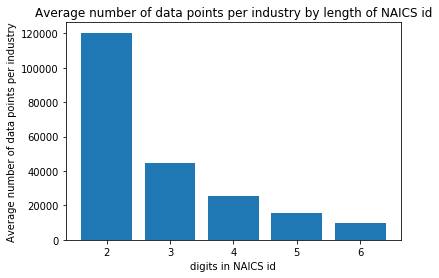

In [5]:
objects = (2, 3, 4, 5, 6)
y_pos = np.arange(len(objects))
plt.bar(objects, [120354, 538336/12, 604465/24, 755078/48, 193721/20])
plt.xlabel("digits in NAICS id")
plt.ylabel("Average number of data points per industry")
plt.title("Average number of data points per industry by length of NAICS id")


Text(0.5, 1.0, 'Number of data points by length of NAICS id')

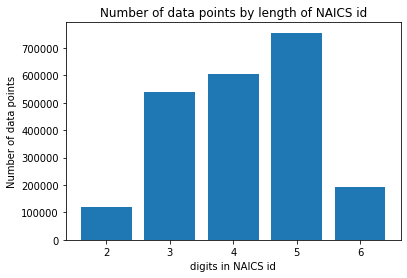

In [6]:
objects = (2, 3, 4, 5, 6)
y_pos = np.arange(len(objects))
plt.bar(objects, [120354, 538336, 604465, 755078, 193721])
plt.xlabel("digits in NAICS id")
plt.ylabel("Number of data points")
plt.title("Number of data points by length of NAICS id")

In [7]:
data[:5]

,Unnamed: 0.1,zip,NAICS.id,NAICS.display-label,RCPSZFE.display-label,ESTAB,City Name,State,level,weight,scale,city scale,County Names,County Fips,City Lat,City Lng
0,0,6001,44-45,Retail trade,All establishments,81,Avon,CT,1,0,Total,large,Hartford,9003,41.79071,-72.85384
1,1,6001,44-45,Retail trade,Establishments operated entire year with sales...,4,Avon,CT,1,1,D,large,Hartford,9003,41.79071,-72.85384
2,2,6001,44-45,Retail trade,Establishments operated entire year with sales...,8,Avon,CT,1,2,C,large,Hartford,9003,41.79071,-72.85384
3,3,6001,44-45,Retail trade,Establishments operated entire year with sales...,20,Avon,CT,1,4,B,large,Hartford,9003,41.79071,-72.85384
4,4,6001,44-45,Retail trade,Establishments operated entire year with sales...,36,Avon,CT,1,8,A,large,Hartford,9003,41.79071,-72.85384


<BarContainer object of 4 artists>

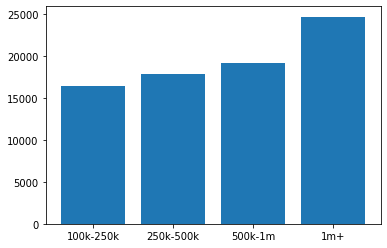

In [14]:
a = data[data['NAICS.id'] == '44-45']
objects = ("100k-250k", "250k-500k", "500k-1m", "1m+")
y_pos = np.arange(len(objects))
plt.bar(objects, [len(a[a['weight'] == 1]), len(a[a['weight'] == 2]), len(a[a['weight'] == 4]), len(a[a['weight'] == 8])])

In [79]:
data_prox = np.load('proximity.npy')

In [80]:
np.argmax(data_prox[:29112], axis = 0)

array([24468, 24468, 27571, 27571, 24468, 24468, 27571, 16998, 24468,
       24468, 12640, 27571], dtype=int64)

In [141]:
a = data_prox[-12:]
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
b = out[np.arange(m)[:,None], sidx] = np.arange(n)
out
np.save("industrysort",b)

In [142]:
large_prox = np.load('largeresult.npy')
a = np.transpose(large_prox[:-12, :])
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
out[np.arange(m)[:,None], sidx] = np.arange(n)
b = out.argsort()[:,::-1][:,:3]
np.save("largesort",b)

In [143]:
medium_prox = np.load('mediumresult.npy')
a = np.transpose(medium_prox[:-12, :])
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
out[np.arange(m)[:,None], sidx] = np.arange(n)
b = out.argsort()[:,::-1][:,:3]
np.save("mediumsort",b)

In [144]:
small_prox = np.load('smallresult.npy')
a = np.transpose(small_prox[:-12, :])
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
out[np.arange(m)[:,None], sidx] = np.arange(n)
b = out.argsort()[:,::-1][:,:3]
out.shape
np.save("smallsort",b)

In [145]:
tiny_prox = np.load('tinyresult.npy')
a = np.transpose(tiny_prox[:-12, :])
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
out[np.arange(m)[:,None], sidx] = np.arange(n)
b = out.argsort()[:,::-1][:,:3]
out.shape
np.save("tinysort",b)

In [146]:
aaa = np.load("tinysort.npy")
aaa.shape

(12, 3)

In [147]:
prox = np.load('final.npy')
a = np.transpose(prox[:-12, :])
sidx = np.argsort(a, axis=1)

# Store shape info
m,n = a.shape

# Initialize output array
out = np.empty((m,n),dtype=int)

# Use sidx as column indices, while a range array for the row indices
# to select one element per row. Since sidx is a 2D array of indices
# we need to use a 2D extended range array for the row indices
out[np.arange(m)[:,None], sidx] = np.arange(n)
b = out.argsort()[:,::-1][:,:3]
b
np.save("allsort",b)